# Image Cartoonification

#### Importing required modules
--> OpenCV <br>
--> Matplotlib for showing the image in notebook itself

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# number of bilateral filtering steps
num_bilateral = 7 

In [3]:
# reading image
img_rgb = cv2.imread("harry.jpeg")
img_color = img_rgb

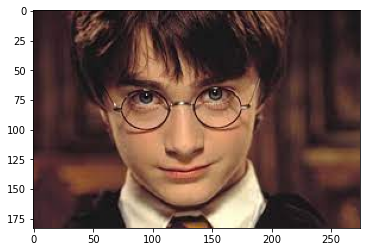

In [4]:
#cv2 works with images in BGR format, so coverting it to RGB format which is used by matplotlib
#showing the input image
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
# repeatedly apply small bilateral filter instead of
# applying one large filter
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

In [6]:
#Use median filter to reduce noise
# convert to grayscale and apply median blur
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

In [7]:
#Use adaptive thresholding to create an edge mask
# detect and enhance edges
img_edge = cv2.adaptiveThreshold(img_blur, 255,
   cv2.ADAPTIVE_THRESH_MEAN_C,
   cv2.THRESH_BINARY,
   blockSize=9,
   C=2)

In [8]:
# Combine color image with edge mask & display picture
# convert back to color, bit-AND with color image
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge, mask = None)

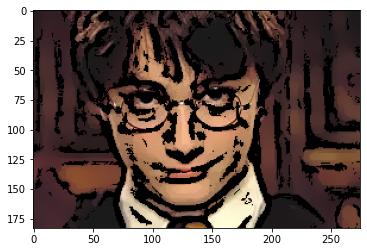

In [9]:
#cv2 works with images in BGR format, so coverting it to RGB format which is used by matplotlib
plt.imshow(cv2.cvtColor(img_cartoon, cv2.COLOR_BGR2RGB))
plt.show()